In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
import statsmodels.api as sm
import numpy as np
import seaborn as sns
from scipy import stats

# preprocess data
raw = pd.read_csv('avocado.csv')

# drop useless index column
raw = raw.drop(columns=['Unnamed: 0'])

# sort by date
raw = raw.sort_values('Date')

# turn type into 0 = conventional 1 = organic
raw["type"].replace({"conventional": 0, "organic": 1}, inplace=True)

# group by region; index resets for each region
raw_by_region = raw.groupby('region', as_index=False)



In [48]:
# try logistic regression

# drop non-numerical/non-continuous columns 
X = raw.drop(columns=['Date', 'region', 'year'])
X = X.drop(columns=['type'])

X = sm.add_constant(X)
y = raw.type

def regression():
    logit = sm.Logit(y, X)
    result = logit.fit()
    return result

result = regression()
predictions = result.predict(X)
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.159206
         Iterations 18
                           Logit Regression Results                           
Dep. Variable:                   type   No. Observations:                18249
Model:                          Logit   Df Residuals:                    18239
Method:                           MLE   Df Model:                            9
Date:                Wed, 04 Mar 2020   Pseudo R-squ.:                  0.7703
Time:                        19:35:39   Log-Likelihood:                -2905.4
converged:                       True   LL-Null:                       -12649.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -3.7742      0.180    -21.013      0.000      -4.126      -3.422
AveragePrice     4.397

c:\users\drew\appdata\local\programs\python\python38\lib\site-packages\statsmodels\discrete\discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


In [49]:
# calculate predicted classes 

predictedvals = []
for x in predictions:
    if x > 0.5:
        predictedvals += [1]
    else:
        predictedvals += [0]

In [50]:
# calculate accuracy score

accuracy = 0
count = 0
for i in y:
    if i == predictedvals[count]:
        accuracy += 1
    count += 1
    
print(accuracy/len(y))
        
#high accuracy, but what is this complete quasi-separation?

0.9460792372184778


In [51]:
# calculate logit of each p

logit = np.log((predictions/(1-predictions)))

c:\users\drew\appdata\local\programs\python\python38\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


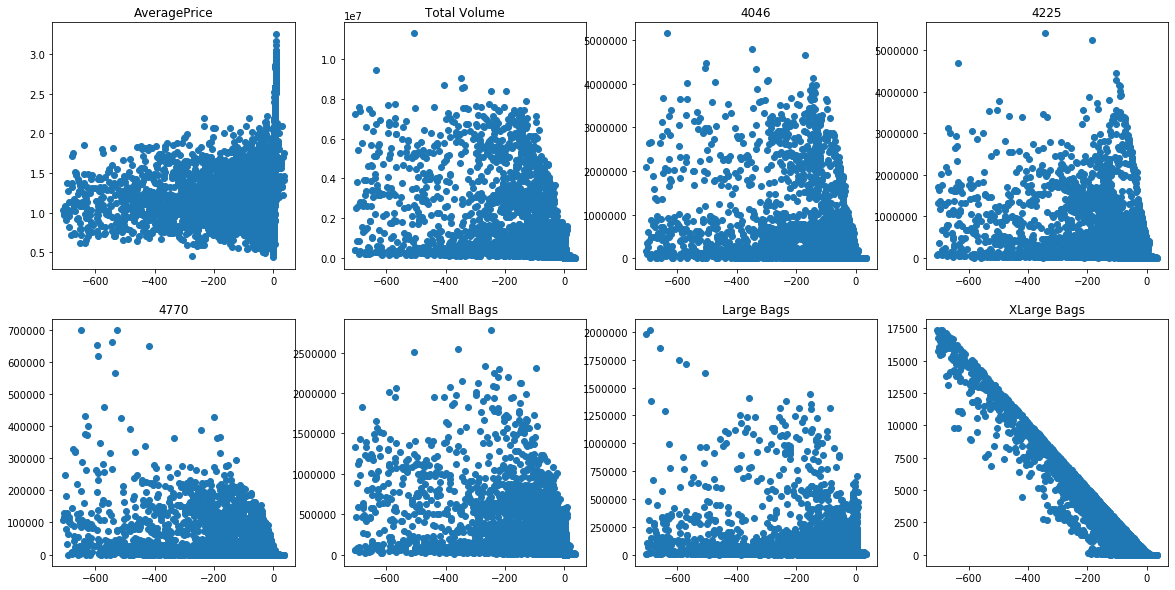

In [52]:
# plot features vs logit to check linearity

fig, axs = plt.subplots(2, 4, figsize=(20, 10))
axs[0, 0].scatter(logit, X[['AveragePrice']])
axs[0, 0].set_title('AveragePrice')

axs[0, 1].scatter(logit, X[['Total Volume']])
axs[0, 1].set_title('Total Volume')

axs[0, 2].scatter(logit, X[['4046']])
axs[0, 2].set_title('4046')

axs[0, 3].scatter(logit, X[['4225']])
axs[0, 3].set_title('4225')

axs[1, 0].scatter(logit, X[['4770']])
axs[1, 0].set_title('4770')

axs[1, 1].scatter(logit, X[['Small Bags']])
axs[1, 1].set_title('Small Bags')

axs[1, 2].scatter(logit, X[['Large Bags']])
axs[1, 2].set_title('Large Bags')

axs[1, 3].scatter(logit, X[['XLarge Bags']])
axs[1, 3].set_title('XLarge Bags')

plt.savefig('avocado_logistic_linearity_test')
# regardless, none of the variables are linearly related to the log odds... but why is XLarge Bags
# shaped the way it is?

In [53]:
# test for complete quasi-separation
# both AveragePrice, Total Volume, XLarge Bags can predict type with > 80% accuracy

cutoff = 1.35
feature = 'AveragePrice'


prices = X[[feature]]

# calculate predicted classes 
predictedvals = []
for x in prices[feature]:
    if float(x) < cutoff:
        predictedvals += [0]
    else:
        predictedvals += [1]


# # calculate accuracy score
accuracy = 0
count = 0
for i in y:
    if i == predictedvals[count]:
        accuracy += 1
    count += 1

print("Predicting type based on whether price is above or below cutoff:")
print('Cutoff:', cutoff)
print("Accuracy:", accuracy/len(y))

# by using a price cutoff of 1.35 we can predict type 

Predicting type based on whether price is above or below cutoff:
Cutoff: 1.35
Accuracy: 0.8003726231574333


In [54]:
cutoff = 65000
feature = 'Total Volume'


prices = X[[feature]]

# calculate predicted classes 
predictedvals = []
for x in prices[feature]:
    if float(x) > cutoff:
        predictedvals += [0]
    else:
        predictedvals += [1]


# # calculate accuracy score
accuracy = 0
count = 0
for i in y:
    if i == predictedvals[count]:
        accuracy += 1
    count += 1

print("Predicting type based on whether total volume is above or below cutoff:")
print('Cutoff:', cutoff)
print("Accuracy:", accuracy/len(y))


Predicting type based on whether total volume is above or below cutoff:
Cutoff: 65000
Accuracy: 0.9138034960819771


In [55]:
cutoff = 0
feature = 'XLarge Bags'


prices = X[[feature]]

# calculate predicted classes 
predictedvals = []
for x in prices[feature]:
    if float(x) > cutoff:
        predictedvals += [0]
    else:
        predictedvals += [1]


# # calculate accuracy score
accuracy = 0
count = 0
for i in y:
    if i == predictedvals[count]:
        accuracy += 1
    count += 1

print("Predicting type based on whether XL bags is above or below cutoff:")
print('Cutoff:', cutoff)
print("Accuracy:", accuracy/len(y))

# 82% accuracy, meaning xl bags > 0 is an 82% chance of being a conventional avocado

Predicting type based on whether XL bags is above or below cutoff:
Cutoff: 0
Accuracy: 0.8238259630664694
